Goal of this notebook to prove:
    -> there is a trend
    -> there is seasonality
    -> demand is not random

This justifies using SARIMA / LSTM later.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better plots
plt.style.use("seaborn-v0_8")

In [13]:
df = pd.read_csv("data/cleaned_walmart.csv", parse_dates=['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[us]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[us](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [16]:
df['Store'].value_counts().head()

Store
1     143
10    143
37    143
17    143
30    143
Name: count, dtype: int64

For time series forecasting, a single store is selected to model demand patterns accurately.

In [17]:
store_df = df[df['Store'] == 1]

In [18]:
ts = (
    store_df
    .groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
    .set_index('Date')
)

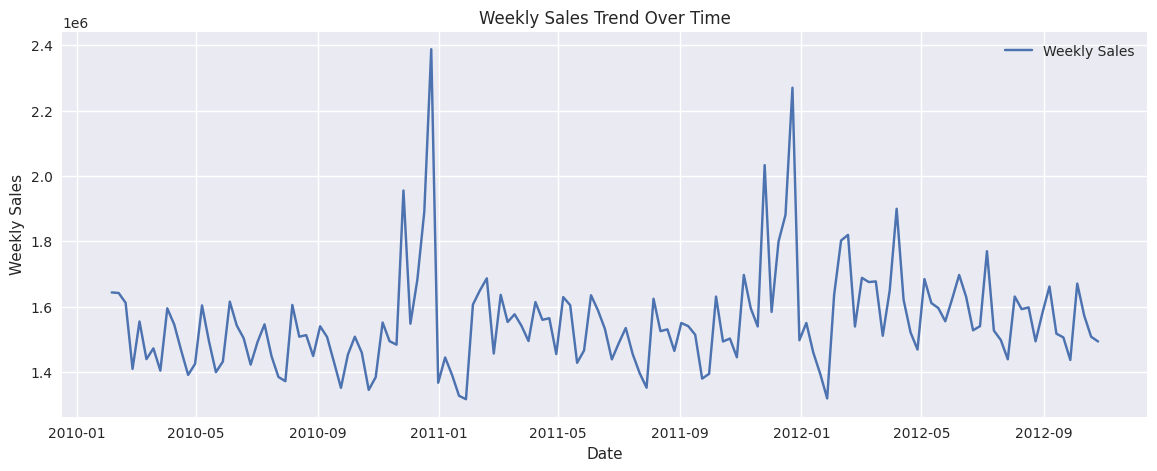

In [19]:
# Plot the Time Series (TREND)
plt.figure(figsize=(14,5))
plt.plot(ts, label='Weekly Sales')
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


The time series shows an overall trend with visible fluctuations, indicating non-stationary behavior.

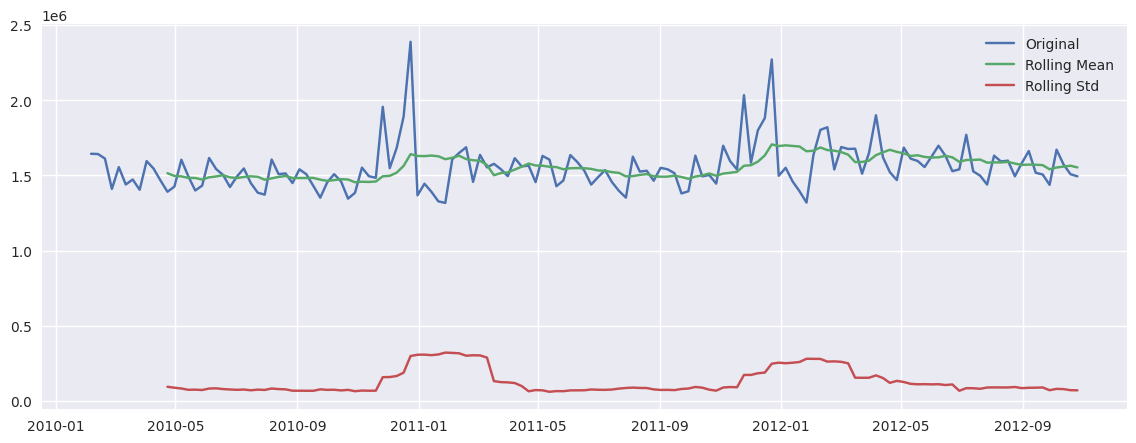

In [20]:
# Rolling Mean & Std (Trend Confirmation)

rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.figure(figsize=(14,5))
plt.plot(ts, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

Changing rolling mean and variance over time confirms the presence of a trend and non-stationarity.

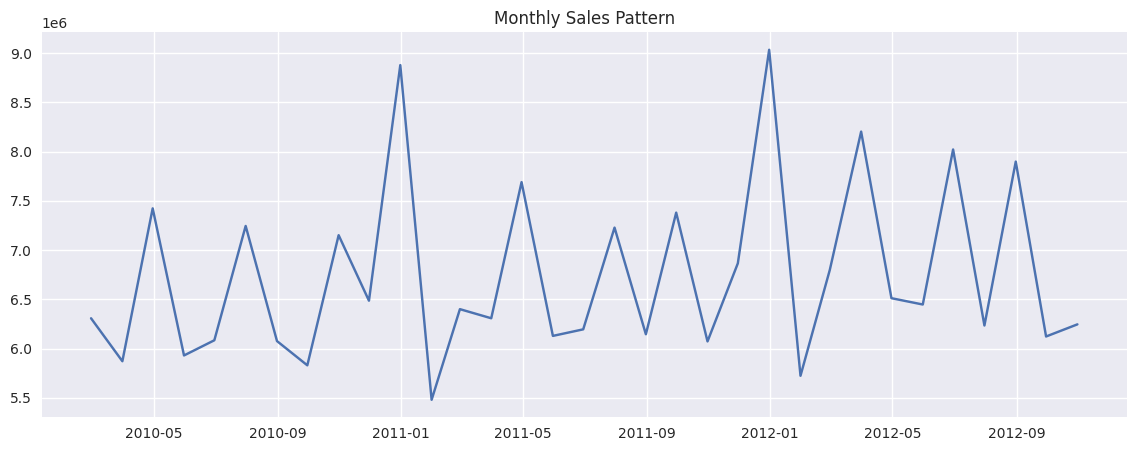

In [21]:
# Seasonality Check (Monthly)

ts_monthly = ts.resample('ME').sum()   # Month End

plt.figure(figsize=(14,5))
plt.plot(ts_monthly)
plt.title("Monthly Sales Pattern")
plt.show()

Sales exhibit repeating patterns at regular intervals, suggesting seasonal behavior.

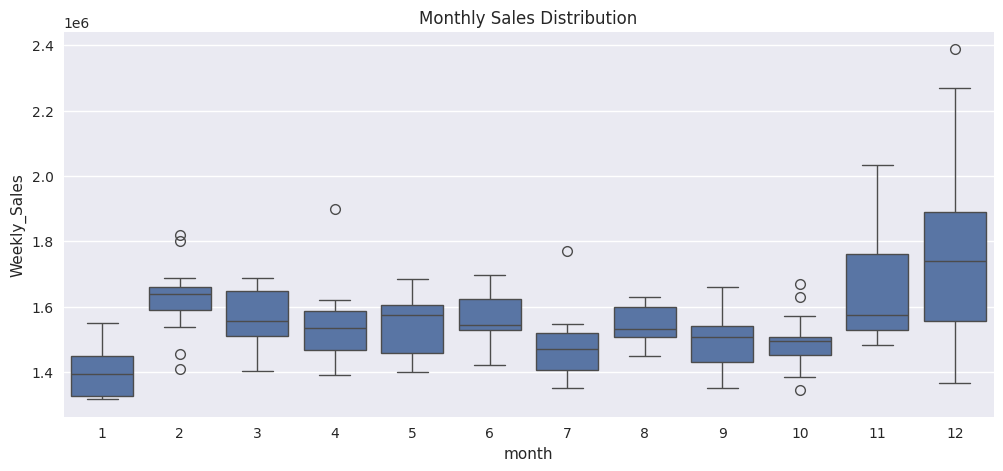

In [22]:
# Boxplot by Month (STRONG SIGNAL)

monthly_df = ts.copy()
monthly_df['month'] = monthly_df.index.month

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='Weekly_Sales', data=monthly_df)
plt.title("Monthly Sales Distribution")
plt.show()

Certain months consistently show higher sales, confirming annual seasonality.

In [23]:
# Holiday Effect (Business Insight)

holiday_sales = store_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales

Holiday_Flag
0    1.546957e+06
1    1.665748e+06
Name: Weekly_Sales, dtype: float64

Holiday weeks show higher average sales compared to non-holiday weeks, highlighting the importance of seasonality in demand forecasting.